# MA 506 Probability and Statistical Inference
# Lecture 16: Ridge Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Remember Linear Regression..

When we discussed linear regression, we discussed Ordinary Least Squares (OLS) formulation resulting from minimizing Mean Squared Error (MSE)

$$
\min_{\beta} MSE = \min_{\beta}\frac{1}{n}||Y - X \beta||_2^2
$$

which resulted in

$$
\hat{\beta}^{OLS} = (X^T X)^{-1} X^T Y
$$

which is referred to as the unbiased estimator because

$$
\mathbb{E}[\hat{\beta}^{OLS}] = (X^T X)^{-1} X^T \mathbb{E}[Y] = (X^T X)^{-1} X^TX \beta = \beta
$$

The estimate $\hat{\beta}^{OLS}$ is called **Best Linear Unbiased Estimator (BLUE)** of $\beta$. Here each of the terms represent the following:

- **Best**: Obtained after minimizing MSE
- **Linear**: Obtained from a Linear model
- **Unbiased**: Because $\mathbb{E}[\hat{\beta}^{OLS}] = \beta$
- **Estimator**: As it estimates $\beta$

# 2. Ridge Regression

1. In Ridge Regression, we trade-off unbiasedness for even lesser variance
2. Problem happens because of co-linearity of features. If two features are highly correlated, the estimator $\beta$ might vary a lot with different samples (high variance)
3. Hence, with correlated features, OLS estimate $\hat{\beta}^{OLS}$ has a high variance (changes a lot with different samples/training data).
4. Ridge Regression is a way to reduce this variance so that estimate: $\hat{\beta}^{ridge}$ is stable and hence generalizes well to unseen data. 

**Hence, in ridge regression we give away unbiasedness for smaller variance and better generalization**

$$
\mathbb{E}[\hat{\beta}^{ridge}] \neq \beta
$$

## 2.1 Ridge Regression formulation

The unstable nature of $\hat{\beta}^{OLS}$ results from it containing very large values for some samples which can drastically change the regression function. So, ridge regression constrains the values the estimate of $\beta$ can have. Hence in Ridge Regression we solve the optimization problem:

$$
\min_{\beta} \frac{1}{n} ||Y - X \beta||_2^2, \text{ such that }||\beta||_2^2 \leq c^2 \tag{1}
$$

Hence, if we are fitting a straight line model: $y = \beta_1 + \beta_2x$, then the relationship between the optimal OLS estimate and Ridge estimate looks something as follows:

<img src = "Picture1.png" width = 400>

Here the blue circle represents the set of all values of $\beta = \begin{bmatrix}\beta_1 \\ \beta_2 \end{bmatrix}$ that satisfy: $||\beta||_2^2 \leq c^2$. As shown in the figure above, the OLS estimate ($\hat{\beta}^{OLS}$) doesnt lie in the blue region so its not acceptable. Hence we keep on moving away from the OLS estimate and the first solution that lie in the blue regions is then chosen as the solution for Ridge Regression. This is because this solutions minimizes MSE as much as possible while satisfying $||\beta||_2^2 \leq c^2$.

## 2.2 Method of Lagrangian multiplier to obtain $\hat{\beta}^{ridge}$

We start with the following penalty based formulation for ridge regression (converting constrained to unconstrained optimization)
$$
F(\beta, \lambda) = \frac{1}{n} ||Y - X \beta||_2^2 + \lambda (||\beta||_2^2 - c^2)
$$

i.e. for a given $\lambda$ and $c$, we want to solve the following optimization problem

$$
\min_{\beta} \Bigg[\frac{1}{n} ||Y - X \beta||_2^2 + \lambda(||\beta||_2^2 - c^2) \Bigg]
$$

Differentiating the above expression with respect to $\beta$ and putting it to 0

$$\frac{\partial}{\partial \beta} \Big( Y^TY - 2 \beta^TX^TX \beta + \beta^T X^TX \beta \Big)
+
n \lambda \frac{\partial}{\partial \beta} (\beta^T \beta) = 0
$$

$$
\implies 0 - 2X^TY + 2X^TX \hat{\beta}^{ridge} + n \lambda (2 \hat{\beta}^{ridge}) = 0
$$

$$
\implies X^TX \hat{\beta}^{ridge} + n \lambda  \hat{\beta}^{ridge} = X^TY
$$

Hence,

$$
 \hat{\beta}^{ridge} = (X^TX + n \lambda I)^{-1}X^TY
$$

Things to note

1. When $\lambda \to 0$ then $\hat{\beta}^{ridge} \to \hat{\beta}^{OLS}$
2. When $\lambda \to \infty$ then $\hat{\beta}^{ridge} \to 0$
3. A finite non-zero $\lambda$ removes the problem of collinearity of features and makes the algorithm more stable
4. It can be proved that if $X^TX$ is full rank, then $\lambda_{optimal} > 0$
5. Ridge Regression is sometimes called Regularized Regression with $L_2$ penalty
6. Ridge Regression is mathematically equivalent to Probabilistic Regression with gaussian prior probability of $\beta$: $\beta \sim N(0,\tau^2I)$, and gaussian likelihood of data: $Y \sim N(X\beta, \sigma^2I)$

## Getting data

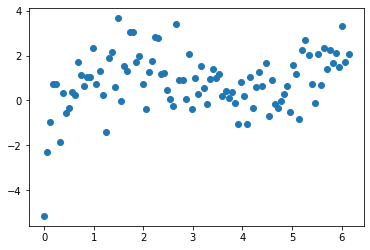

In [2]:
np.random.seed(0)
x = np.linspace(0.001,6.14,100)
y = np.sin(x) + np.log(x)
err = np.random.randn(len(x))
y_noisy = y+err
plt.scatter(x,y_noisy)
plt.show()

### Fitting multiple models to this data

1. Linear Regression: $y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \beta_4x^4 + \beta_5x^5 + \beta_6x^6 + \beta_7x^7$
2. Ridge Regression with the same features: $[1, x, x^2, x^3, x^4, x^5, x^6, x^7]$



In [3]:
def poly_power(x,n):
    X = []
    for i in x:
        temp = []
        for j in range(n+1):
            temp.append(i**j)
                
        X.append(temp)
    return np.array(X)

In [4]:
X = poly_power(x,7)

In [5]:
beta_ols = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y_noisy))
xpred = np.linspace(0,6.14,200)
Xp = poly_power(xpred,n = 7)
yp_ols = Xp.dot(beta_ols)

In [6]:
lambda1 = 0.001
n = len(y_noisy)
beta_ridge = np.linalg.inv(X.T.dot(X) + n*lambda1*np.eye(X.shape[1])).dot(X.T.dot(y_noisy))
yp_ridge = Xp.dot(beta_ridge)

## plotting the regression plots

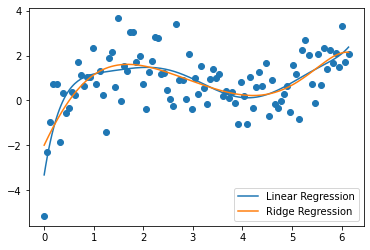

In [7]:
plt.plot(xpred,yp_ols,label = 'Linear Regression')
plt.plot(xpred,yp_ridge,label = 'Ridge Regression')
plt.scatter(x,y_noisy)
plt.legend()
plt.show()

### <mark style="background-color: #FFFF00">Exercise</mark> 

1. Varying $\lambda$ from 0 to 100, visualize how the 8 $\beta$ values will look like. Hence, in essence plot 8 curves in a $\beta$ vs $\lambda$ plot.\
2. Comment on the behavior of the plot.

# References
1: https://online.stat.psu.edu/stat857/node/155/